# Prediction of customer churn using ANN

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./datasets/Churn_Modelling.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Geography'] = encoder.fit_transform(df['Geography'])
df['Gender'] = encoder.fit_transform(df['Gender'])

In [4]:
x = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [6]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


model = Sequential([
    Dense(6, input_dim = x.shape[1], activation='relu', kernel_initializer='he_uniform'),
    Dense(6, activation='relu', kernel_initializer='he_uniform'),
    Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform')
])

model.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=35, validation_data=(x_test, y_test), batch_size=10)

Epoch 1/35
800/800 [==============================] - 2s 2ms/step - loss: 1202.0831 - accuracy: 0.5224 - val_loss: 0.7824 - val_accuracy: 0.8005
Epoch 2/35
800/800 [==============================] - 1s 2ms/step - loss: 0.9554 - accuracy: 0.7707 - val_loss: 0.7695 - val_accuracy: 0.8010
Epoch 3/35
800/800 [==============================] - 1s 2ms/step - loss: 0.8338 - accuracy: 0.7656 - val_loss: 0.9694 - val_accuracy: 0.8025
Epoch 4/35
800/800 [==============================] - 2s 2ms/step - loss: 0.7330 - accuracy: 0.7729 - val_loss: 0.6459 - val_accuracy: 0.8020
Epoch 5/35
800/800 [==============================] - 2s 2ms/step - loss: 0.7615 - accuracy: 0.7686 - val_loss: 0.5321 - val_accuracy: 0.8020
Epoch 6/35
800/800 [==============================] - 2s 2ms/step - loss: 0.7518 - accuracy: 0.7681 - val_loss: 0.6365 - val_accuracy: 0.8020
Epoch 7/35
800/800 [==============================] - 1s 2ms/step - loss: 0.7300 - accuracy: 0.7721 - val_loss: 0.5308 - val_accuracy: 0.8020
Epo

In [7]:
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline


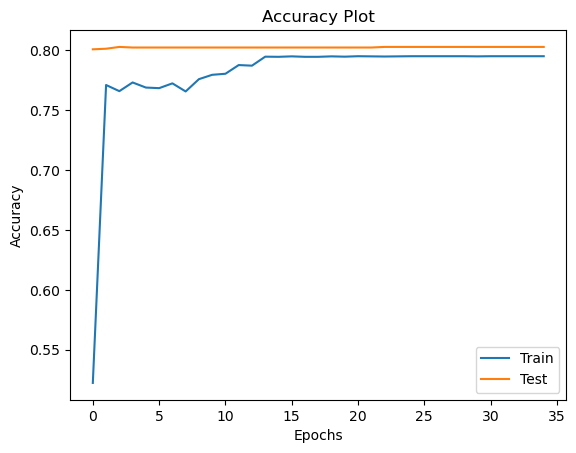

In [9]:
plt.plot(acc)
plt.plot(val_acc)
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

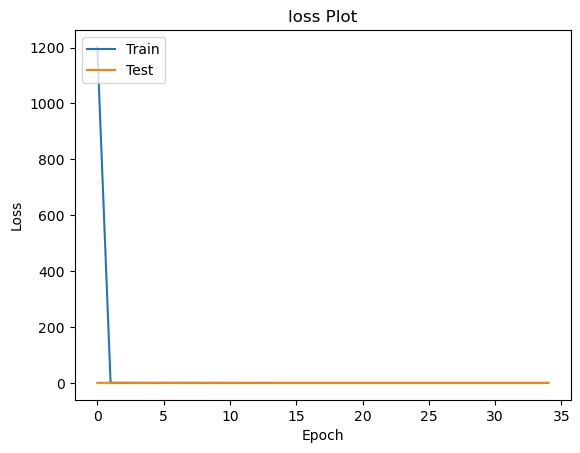

In [10]:
plt.plot(loss)
plt.plot(val_loss)
plt.title('loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()